# Linear Regression


In [1]:
import numpy as np

In [2]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


$$ f(x) = x^4-4x^3+2 $$

In [3]:
f=lambda x: x**4-4*x**3+2

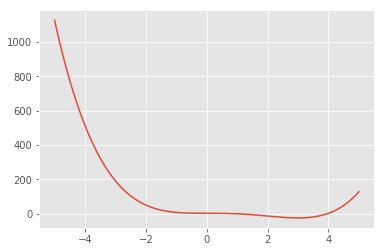

In [4]:
x=np.linspace(-5,5,1000)
y= f(x)
plt.plot(x,y)

### Brute-force Search
Lets do a brute-force search for the given variable in the limit.

In [5]:
minimum=+np.inf
mx=+np.inf

# Your code here
for i in range(10000):
    if(mx<minimum):
        mx-=minimum
print("Local minimum occurs at {}".format(mx))

Local minimum occurs at inf


### Gradient Descent

In [6]:
def f_derivative(x):
    # Your code here\
    # Calculate the derivative and write your code here
    return (4*(x**3) - 12*(x**2))

In [7]:
x_old = 0
x_new = np.random.rand(1,1) 
eps = 0.01 # step size
precision = 0.00001

# Your code here

print("Local minimum occurs at", x_new)

Local minimum occurs at [[0.09913838]]


#### Always Check your gradient, before debugging gradient descent,

We know that $$\frac{\partial f}{\partial x}=\frac{f(x+\epsilon)-f(x)}{\epsilon}$$

So always compare the difference between computed gradient using this formula.


#### Lets Check

In [8]:
eps=0.00001
x=1.5
dfx=(f(x+eps)-f(x))/eps
cdfx=f_derivative(x)

print(dfx, cdfx, dfx-cdfx)

-13.500044999936732 -13.5 -4.499993673157121e-05


### Let's generate some random data

In [9]:
X = np.arange(0,5,0.1, dtype=np.float32)
delta = np.random.uniform(-1,1, size=X.shape[0])
Y = .4 * X + 3 + delta

#making a copy for later use
rx = X
ry = Y

Text(0, 0.5, 'Y')

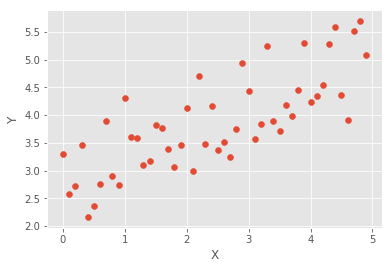

In [10]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

### Let's visualize our solution space

In [11]:
cf=lambda t0,t1,x,y: np.dot(t1*x+t0-y,t1*x+t0-y)
#square error

In [12]:
t0=arange(-5,+5,0.01)
t1=arange(-5,+5,0.01)

In [13]:
ecf=np.zeros((len(t0),len(t1)))

for i in range(len(t0)):
    for j in range(len(t1)):
        ecf[i,j]=cf(t0[i],t1[j],X,Y)

In [14]:
print(ecf)

[[25426.92505108 25363.84383521 25300.84634771 ...  2678.57272255
   2696.10048384  2713.70821807]
 [25405.80710663 25342.75029426 25279.77721247 ...  2681.88166324
   2699.43392251  2717.06616303]
 [25384.69911355 25321.66713219 25258.71875436 ...  2685.20062603
   2702.77736741  2720.43412045]
 ...
 [ 9337.70362645  9299.04925963  9260.47752316 ... 10942.57028435
  10984.52533045 11026.55877862]
 [ 9326.55573599  9287.9258812   9249.37863364 ... 10955.84945282
  10997.82900021 11039.8869482 ]
 [ 9315.418009    9276.81269717  9238.28997384 ... 10969.13836637
  11011.14228019 11053.22486703]]


In [15]:
# Generate theta_0 and theta_1 values for the cost function...
tX, tY = np.meshgrid(t0, t1)
print(tX.shape, tY.shape)

(1000, 1000) (1000, 1000)


In [16]:
print(ecf.shape)

(1000, 1000)


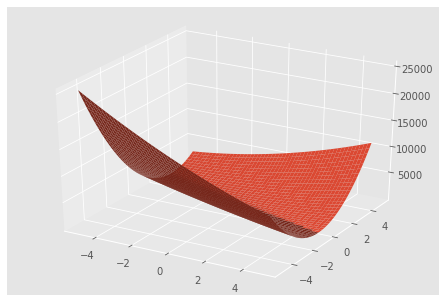

In [17]:
#Plot the cost function...
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(tX,tY,ecf.T)
# ax.set_xlabel(r'$\theta_0$(Intercept)')
# ax.set_ylabel(r'$\theta_1$(Slope)')
# ax.set_zlabel(r'$J(\theta_0,\theta_1)$(Cost Function)')

### Time for our regression implementation

$$
h(X, \theta) = X^T . \theta
$$

In [18]:
def hyp(theta, X):
    # Your code here
    return (np.dot(X,theta))

$$
cost = \frac{1}{2m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)}^2
$$

In [19]:
def cost_function(theta,X,Y):
    # Your code here
    hypothese = (hyp(theta,X).T)
    return ((np.sum(np.power((hypothese - Y),2)))/(2*Y.shape[0]))

$$
\frac{\delta}{\delta \theta_j} = \frac{1}{m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)} * X_j
$$

In [20]:
def derivative_cost_function(theta,X,Y):
    nexamples=float(X.shape[0])
    # Your code here
    hypothese = (hyp(theta,X).T)
    theta0 = np.mean(hypothese-Y)
    theta1 = np.mean(((hypothese-Y)*X[:,0]))
    theta1 += (0.001/nexamples)*theta1
    return theta1,theta0
    # theta0*X +theta1
    #X

In [21]:
print(X.shape)
nx=np.hstack((X,ones(len(X),)))
nx=nx.reshape((2,X.shape[0])).T
print(nx.shape)

(50,)
(50, 2)


In [22]:
np.random.seed(20) # To make sure you have the same value as me
eps=0.0001
nexamples=float(nx.shape[0])
thetas=np.random.rand(nx.shape[1],)

In [23]:
cf=cost_function(thetas,nx,Y)
print(cf)

1.340853991024206


In [24]:
ad=derivative_cost_function(thetas,nx,Y)
print(ad)

(-3.491160931461088, -1.534000672955913)


In [25]:
#Gradient Descent...
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxniter=50000):
    
    nexamples=float(X.shape[0])
    thetas=rand(X.shape[1],)
    
    eps=0.00001#step size
    alpha=0.01 
    cf=[]
    numiter=0
    prev_theta = 0
    for numiter in range(maxniter):
        prev_theta = thetas - (np.multiply(derivative_cost_function(thetas,X,Y),alpha))
        thetas = prev_theta
        cf.append(cost_function(thetas,X,Y))
    # Your code here
    
    return thetas

In [26]:
theta_new=GradientDescent(nx,Y,cost_function,derivative_cost_function) 
print(theta_new)

[0.45981839 2.74607981]


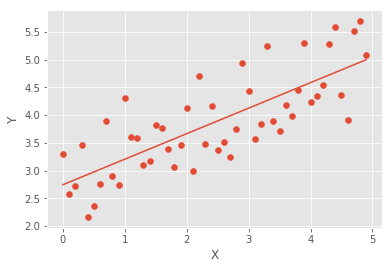

In [27]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(nx[:,0],np.dot(nx,theta_new))

In [28]:
temp=np.polyfit(X,Y,1)
print(temp)

[0.45981839 2.74607981]


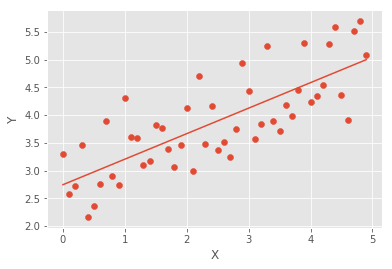

In [29]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(nx[:,0],np.dot(nx,temp))